# Lesson 5: Simulations

## Simulations within Aerospace
Simulations play a crucial role in aerospace engineering due to the complexity and cost associated with testing and developing aerospace systems. They provide a cost-effective and efficient way to model and analyze the behavior of various aerospace components, systems, and missions. Applications of simulations with aerospace include:

- Performance Analysis of aircraft, spacecraft, and propulsion systems
- Mission Planning for missions such as satellite deployments, planetary landings, etc
- Digital Engineering (mimicking real-life scenarios using computational models) of space systems

![https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBLkz6dPRitoYbDpHqcE8PJL193YIu4zIVcS8Ux3wqww&s](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBLkz6dPRitoYbDpHqcE8PJL193YIu4zIVcS8Ux3wqww&s)

[Image Source](https://simulatemore.mscsoftware.com/category/industries/aerospace-defense/)

## 2D Orbital Mechanics Simulation
Let's create a simulation that models the behavior of a 2D orbit by numerically integrating the differential equations that describe the motion of the orbiting body. 

### Orbit Equation
In order to create this simulation, we will need to define an Ordinary Differential Equation (ODE) system that describes the motion of the orbiting body within the gravitational field of the central mass. To do so, let's breakdown some key equations:

All forces can be described by the following equation:
$$
F = ma
$$

In this example, the net force acting on the object is the gravitational force exerted by the central mass which is indicated by Newton's Universal Law of Gravitation:
$$
F = \frac{G * M * m}{r^2}
$$

From that equation, we can obtain the centripetal acceleration of the celestial body as:
$$
a = \frac{v^2}{r}
$$

## Initializing State Vectors
State vectors are like snapshots which store information about the orbit at a time `t`.
The state vector breakdown for this simulation is as follows:

- `state_vectors[0]`: x position 
- `state_vectors[1]`: y position 
- `state_vectors[2]`: velocity in x direction 
- `state_vectors[3]`: velocity in y direction

## Deriving Acceleration
For the state vector, we can easily access the Vx (dx/dt) and Vy (dy/dt) values:
```
dxdt = y[2]
dydt = y[3]
```

Using the equations above we can get an acceleration value in the x and y directions.
Let's do a quick derivation of ax:
$$
m * a_{\text{x}} = \frac{G * M * m}{r^2} * \frac{x}{r}
$$
In the above, we set Newton's 2nd Law to the Universal Law of Gravitation which simplifies to the following:
$$
a_{\text{x}} = \frac{G * M * x}{r^3} 
$$

This is represented by the following code:
```
dvxdt = -G * M * y[0] / (np.sqrt(y[0]**2 + y[1]**2))**3
```


![https://kyleniemeyer.github.io/space-systems-notes/_images/two-body-problem.png](https://kyleniemeyer.github.io/space-systems-notes/_images/two-body-problem.png)

[Image Source](https://kyleniemeyer.github.io/space-systems-notes/orbital-mechanics/two-body-problems.html)

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
def orbit_equations_de(state_vectors, t, G, M):
    # y[0] and y[1] represent the x and y positions respectively
    # y[2] and y[3] represent the x and y velocities respectively
    dxdt = state_vectors[2]
    dydt = state_vectors[3]
    dvxdt = -G * M * state_vectors[0] / (np.sqrt(state_vectors[0]**2 + state_vectors[1]**2))**3
    dvydt = -G * M * state_vectors[1] / (np.sqrt(state_vectors[0]**2 + state_vectors[1]**2))**3
    return [dxdt, dydt, dvxdt, dvydt]

In [8]:
# Define initial conditions
y0 = [1.0, 0.0, 0.0, 1.0]  # Initial position at (1, 0) and velocity (0, 1)

# Define time points for integration
t = np.linspace(0, 10, 1000)

# Define constants
G = 1.0  # Gravitational constant
M = 1.0  # Mass of the central body

In [9]:
# Perform numerical integration
solution = odeint(orbit_equations_de, y0, t, args=(G, M))

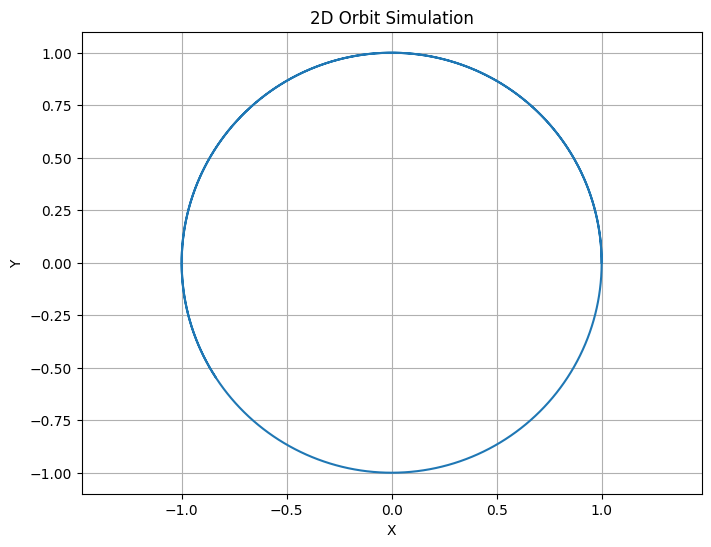

In [11]:
# Plot the orbit trajectory
plt.figure(figsize=(8, 6))
plt.plot(solution[:, 0], solution[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Orbit Simulation')
plt.grid(True)
plt.axis('equal')
plt.show()

## Exercise 1: Simulating 2D Orbital Mechanics for Earth
Let's leverage the differential equations defined in the previous example to make a simulation of an orbit of a celestial body around Earth!

#### Objectives:
- Create a function that takes in `state_vectors, t, G, M` and returns `dxdt, dydt, dvxdt, dvydt`
- Define the initial value for altitude to be `400e3`
- Define the initial value for velocity to be `7800`
- Define the gravitational constant to be `6.67430e-11`
- Define the Mass of Earth to be `5.972e24`
- Perform numerical integration using `odeint`
- Visualize the simulation using `matplotlib`

Awesome! In this chapter, we covered a wide range of topics including the foundations of mathematical plotting, differential equations, imagery analysis, and simulations! For the chapter project, you will be applying all of those skills to create a numerical solver for the quintessential Rocket Equation.